In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#Casual users would be most harder to predict; holidays, seasonal, etc.
#Washington has a different seasonalities compared to Toronto. 
#Feature engineering,  one hot encoding

In [5]:
#convert date tine to datetime variable
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [6]:
bikes['hour'] = bikes['datetime'].apply(lambda x: x.hour)

In [7]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [8]:
#Make sure there are no spaces in the variable, to ensure efficient oneHotEncoding
def time_of_day(x):
    if x >=3 and x <= 9:
        return 'morning_commute'
    elif x >= 10 and x <= 14:
        return 'midday'
    elif x >= 15 and x <= 19:
        return 'evening_commute'
    elif x >= 20 and x <= 23:
        return 'after_hours'
    else:
        return 'late_night'

In [9]:
bikes['time_of_day'] = bikes['hour'].apply(time_of_day)

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_17410/2872508721.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='casual', data=bikes, palette="tab10")


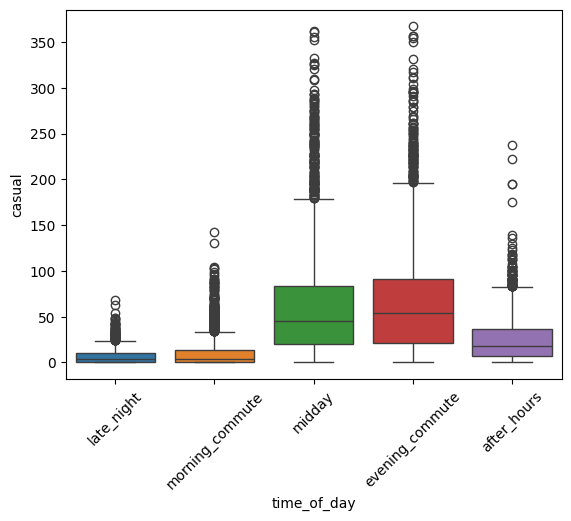

In [10]:
sns.boxplot(x='time_of_day', y='casual', data=bikes, palette="tab10")
plt.xticks(rotation=45);

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_17410/2245670799.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='registered', data=bikes, palette="rocket")


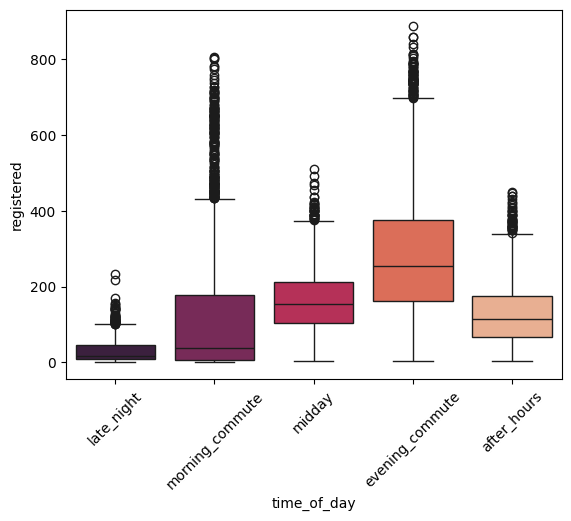

In [11]:
sns.boxplot(x='time_of_day', y='registered', data=bikes, palette="rocket")
plt.xticks(rotation=45);

<Axes: xlabel='season', ylabel='count'>

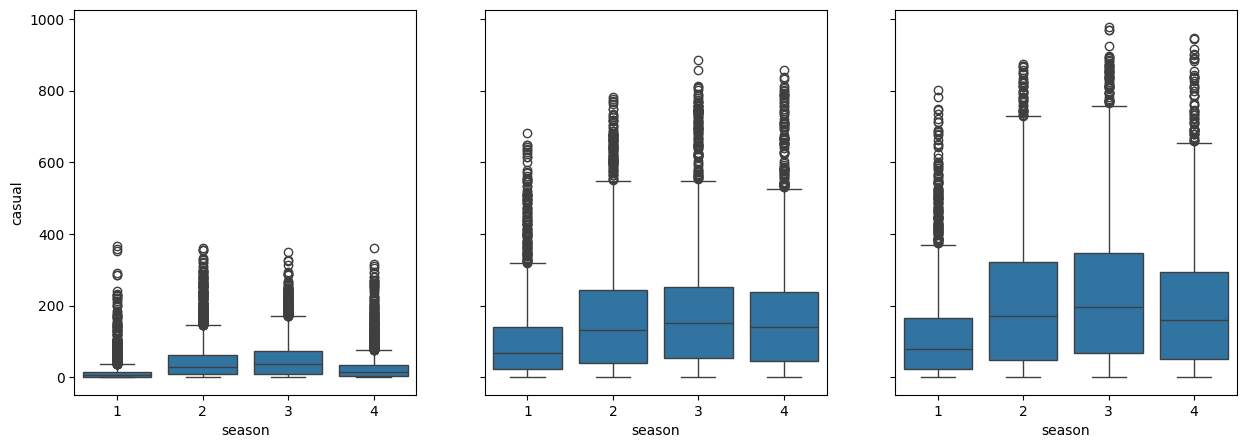

In [12]:
# season    holiday workingday  weather
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='season', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='season', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='season', y='count', data=bikes, ax=ax3)

<Axes: xlabel='weather', ylabel='count'>

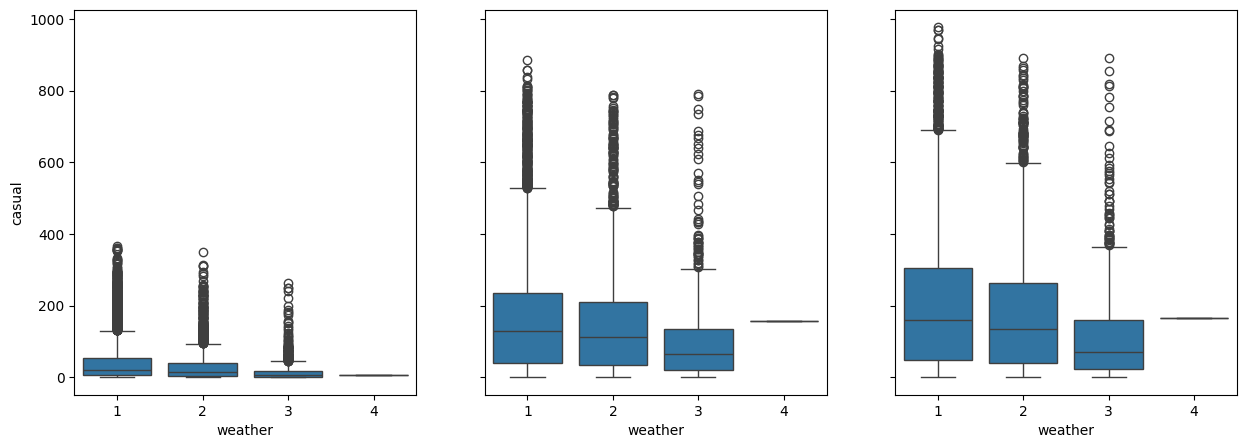

In [13]:
# season    holiday workingday  weather
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='weather', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='weather', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='weather', y='count', data=bikes, ax=ax3)

<Axes: xlabel='holiday', ylabel='count'>

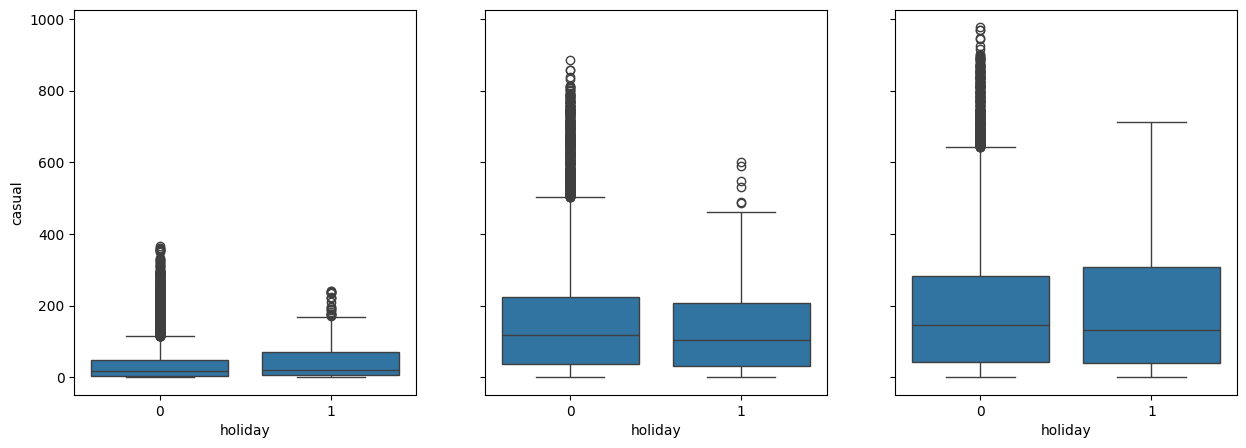

In [14]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='holiday', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='holiday', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='holiday', y='count', data=bikes, ax=ax3)

<Axes: xlabel='workingday', ylabel='count'>

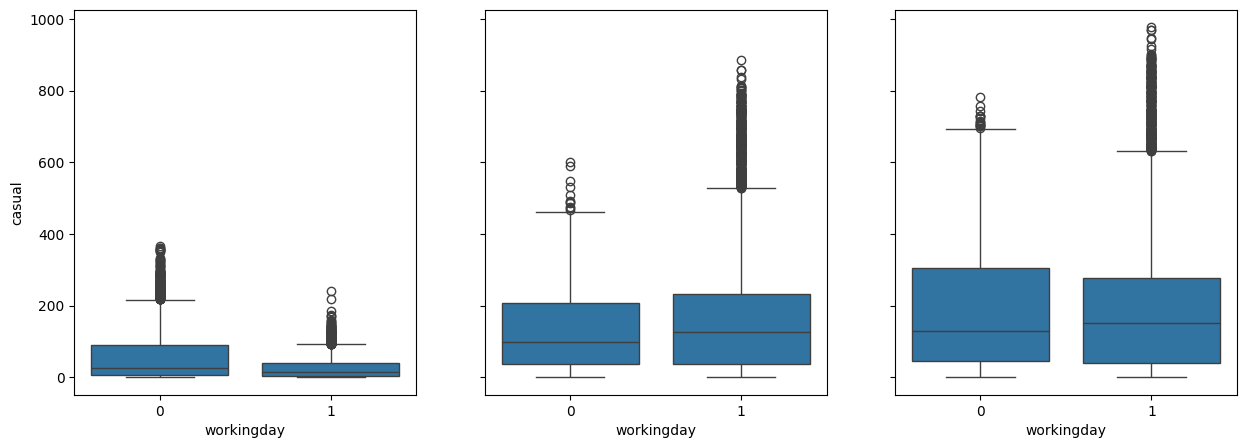

In [15]:
#Good predictor for casual users
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='workingday', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='workingday', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='workingday', y='count', data=bikes, ax=ax3)

In [16]:
bikes['weekday'] = bikes['datetime'].apply(lambda x: x.weekday())

<Axes: xlabel='weekday', ylabel='count'>

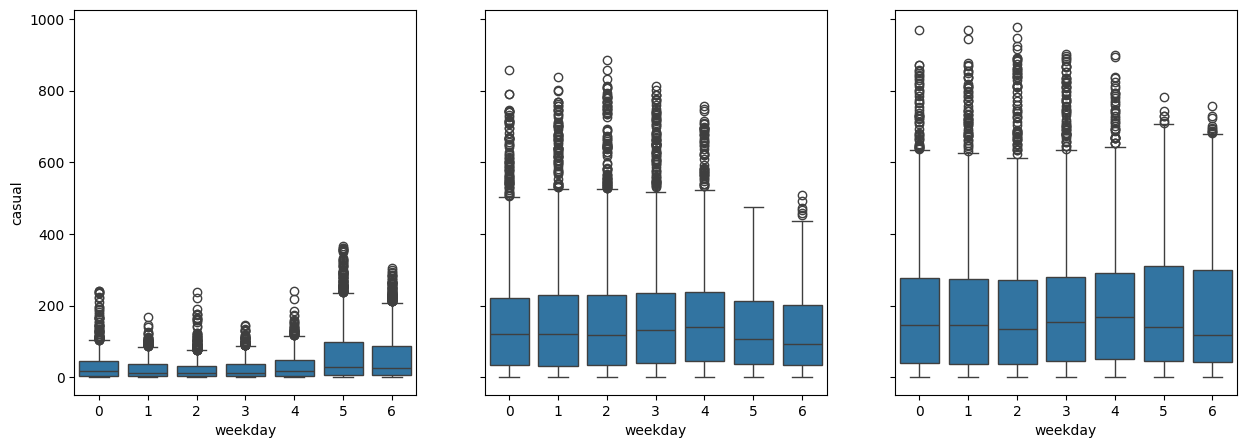

In [17]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='weekday', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='weekday', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='weekday', y='count', data=bikes, ax=ax3)

In [18]:
#create a daily dataset
bikes_daily = bikes.set_index('datetime')

In [19]:
bikes_daily = bikes_daily.resample('D').agg({'season':'max', 'holiday':'max','workingday':'max', 'weather':'mean', 'temp':'mean','atemp':'mean','humidity':'mean', \
                               'windspeed':'mean','casual':'sum','registered':'sum','count':'sum', 'weekday':'max'})

In [20]:
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
datetime,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,331,654,985,5.0
2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,131,670,801,6.0
2011-01-03,1.0,0.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,120,1229,1349,0.0
2011-01-04,1.0,0.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,108,1454,1562,1.0
2011-01-05,1.0,0.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,82,1518,1600,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,1.375000,13.290833,16.919167,65.041667,7.125450,767,4280,5047,5.0
2012-12-16,4.0,0.0,0.0,2.041667,14.862500,18.496875,83.875000,6.749692,538,3248,3786,6.0
2012-12-17,4.0,0.0,1.0,2.125000,16.126667,20.075000,90.708333,6.583308,212,4373,4585,0.0


<Axes: xlabel='weekday', ylabel='count'>

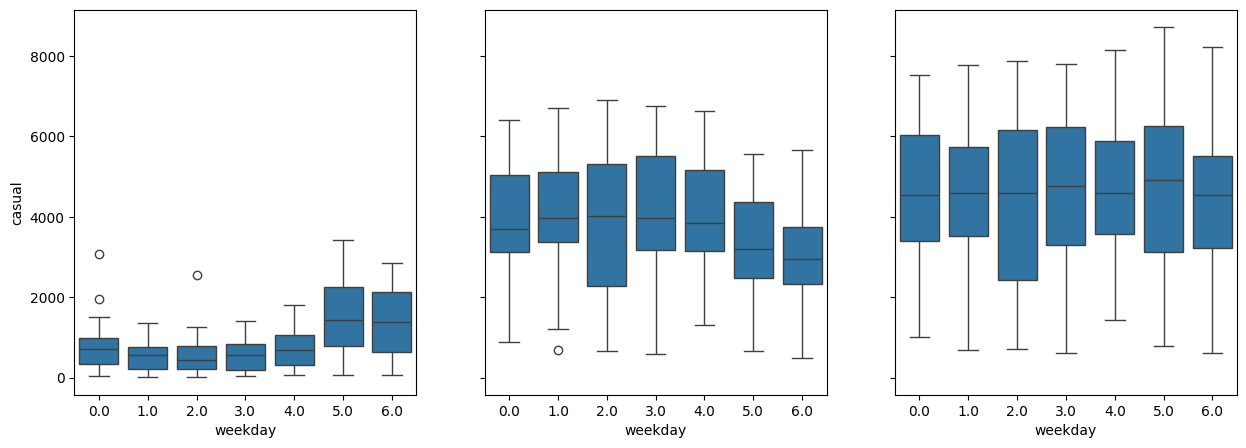

In [21]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='weekday', y='casual', data=bikes_daily, ax=ax1)
sns.boxplot(x='weekday', y='registered', data=bikes_daily, ax=ax2)
sns.boxplot(x='weekday', y='count', data=bikes_daily, ax=ax3)

<Axes: xlabel='temp', ylabel='count'>

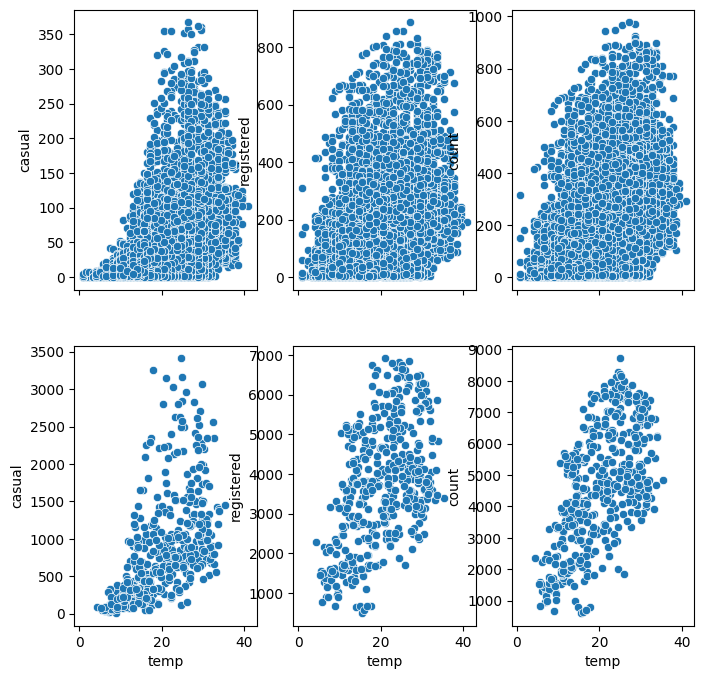

In [22]:
# temp and rentals
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=False, sharex=True)
sns.scatterplot(x='temp', y='casual', data=bikes, ax=ax1)
sns.scatterplot(x='temp', y='registered', data=bikes, ax=ax2)
sns.scatterplot(x='temp', y='count', data=bikes, ax=ax3)
sns.scatterplot(x='temp', y='casual', data=bikes_daily, ax=ax4)
sns.scatterplot(x='temp', y='registered', data=bikes_daily, ax=ax5)
sns.scatterplot(x='temp', y='count', data=bikes_daily, ax=ax6)

<Axes: xlabel='temp', ylabel='count'>

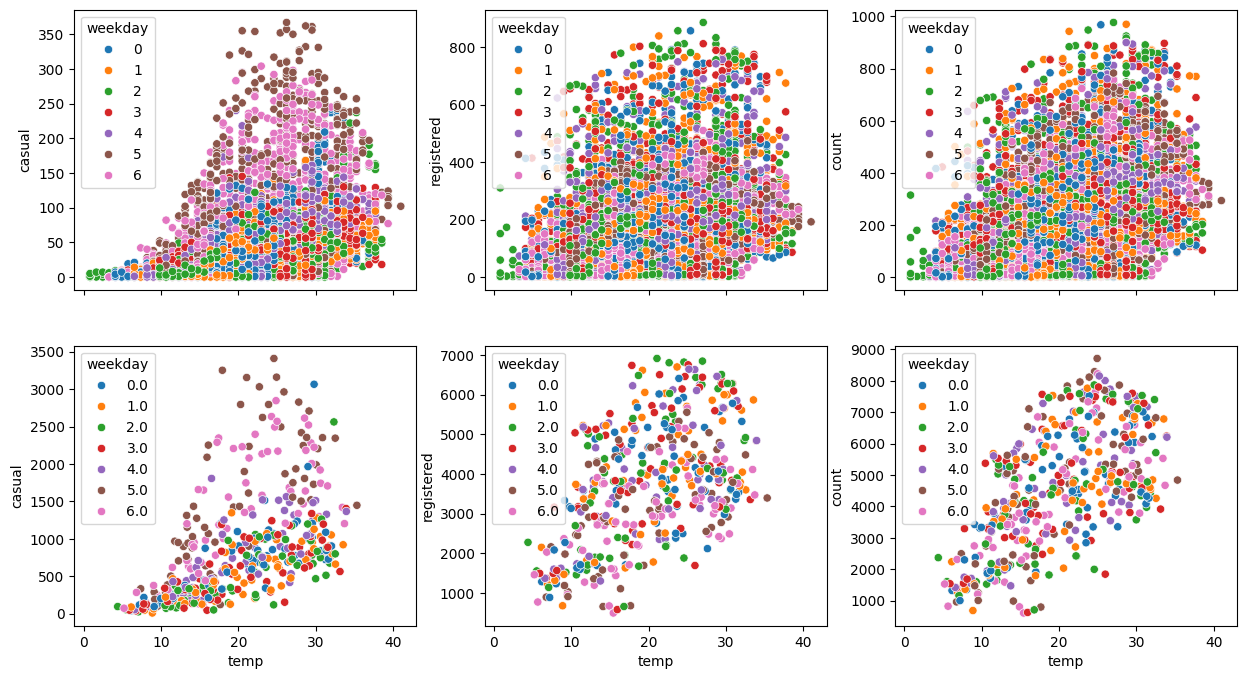

In [23]:
# temp and rentals

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,8), sharey=False, sharex=True)
sns.scatterplot(x='temp', y='casual', hue='weekday', data=bikes, ax=ax1, palette="tab10")
sns.scatterplot(x='temp', y='registered',  hue='weekday', data=bikes, ax=ax2, palette="tab10")
sns.scatterplot(x='temp', y='count',  hue='weekday', data=bikes, ax=ax3, palette="tab10")
sns.scatterplot(x='temp', y='casual',  hue='weekday', data=bikes_daily, ax=ax4, palette="tab10")
sns.scatterplot(x='temp', y='registered',  hue='weekday', data=bikes_daily, ax=ax5, palette="tab10")
sns.scatterplot(x='temp', y='count',  hue='weekday', data=bikes_daily, ax=ax6, palette="tab10")

In [24]:
#linear regression in Statsmodel
results = ols("casual ~ temp", data=bikes).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3037.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:37:35   Log-Likelihood:                -56684.
No. Observations:               10886   AIC:                         1.134e+05
Df Residuals:                   10884   BIC:                         1.134e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.5710      1.178    -20.855      0.0

In [25]:
#the closer r-squared is to 1, the better your variables are. If you h
#if the P values is less that 0.05, it means the varibable is statistically significant.

In [26]:
results = ols("casual ~ temp", data=bikes_daily[~bikes_daily['weekday'].isin([5,6])]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     334.4
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           9.87e-52
Time:                        21:37:35   Log-Likelihood:                -2310.9
No. Observations:                 324   AIC:                             4626.
Df Residuals:                     322   BIC:                             4633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -228.1496     49.419     -4.617      0.0

In [27]:
#create dummies
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
datetime,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,331,654,985,5.0
2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,131,670,801,6.0
2011-01-03,1.0,0.0,1.0,1.000000,8.050909,9.470227,43.727273,16.636709,120,1229,1349,0.0
2011-01-04,1.0,0.0,1.0,1.043478,8.200000,10.606087,59.043478,10.739809,108,1454,1562,1.0
2011-01-05,1.0,0.0,1.0,1.000000,9.305217,11.463478,43.695652,12.522300,82,1518,1600,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,1.375000,13.290833,16.919167,65.041667,7.125450,767,4280,5047,5.0
2012-12-16,4.0,0.0,0.0,2.041667,14.862500,18.496875,83.875000,6.749692,538,3248,3786,6.0
2012-12-17,4.0,0.0,1.0,2.125000,16.126667,20.075000,90.708333,6.583308,212,4373,4585,0.0


In [28]:
bikes_daily.dropna(inplace=True)

In [29]:
season_dummies = pd.get_dummies(bikes_daily['season'], dtype=int)

In [30]:
season_dummies

,1.0,2.0,3.0,4.0
datetime,,,,
2011-01-01,1,0,0,0
2011-01-02,1,0,0,0
2011-01-03,1,0,0,0
2011-01-04,1,0,0,0
2011-01-05,1,0,0,0
...,...,...,...,...
2012-12-15,0,0,0,1
2012-12-16,0,0,0,1
2012-12-17,0,0,0,1


In [31]:
season_dummies.rename(columns={1:'season1', 2:'season2', 3:'season3', 4:'season4'}, inplace=True)

In [32]:
#addig back to the dataframe
bikes_daily = pd.concat([bikes_daily, season_dummies], axis=1)

In [33]:
bikes_daily[(~bikes_daily['weekday'].isin([5,6])) & (bikes_daily['temp'] >19) & (bikes_daily ['temp'] < 21)]['casual'].mean()

725.9444444444445

In [34]:
results = ols("casual ~ temp + season1 + season2 + season3", data=bikes_daily[~bikes_daily['weekday'].isin([5,6])]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     88.17
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           2.24e-50
Time:                        21:37:35   Log-Likelihood:                -2305.6
No. Observations:                 324   AIC:                             4621.
Df Residuals:                     319   BIC:                             4640.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -99.1818     77.954     -1.272      0.2

In [37]:
predicted_vals = results.predict(bikes_daily[['temp','season1','season2','season3']])

In [38]:
predicted_vals

datetime
2011-01-01    296.307524
2011-01-02    323.099380
2011-01-03     91.253634
2011-01-04     96.298527
2011-01-05    133.696540
                 ...    
2012-12-15    350.549377
2012-12-16    403.730960
2012-12-17    446.507450
2012-12-18    470.785999
2012-12-19    362.110591
Length: 456, dtype: float64

In [39]:
residuals = bikes_daily['casual'] - predicted_vals

In [40]:
residuals

datetime
2011-01-01     34.692476
2011-01-02   -192.099380
2011-01-03     28.746366
2011-01-04     11.701473
2011-01-05    -51.696540
                 ...    
2012-12-15    416.450623
2012-12-16    134.269040
2012-12-17   -234.507450
2012-12-18    -37.785999
2012-12-19    -29.110591
Length: 456, dtype: float64

In [45]:
# first square the residuals
# then take the sqrt of the mean 
rmse = np.mean(np.sqrt(residuals**2))

In [47]:
avg_rentals = bikes_daily[(~bikes_daily['weekday'].isin([5,6]))]['casual'].mean()

In [48]:
rmse/avg_rentals

0.6280563489083543

<Axes: ylabel='Count'>

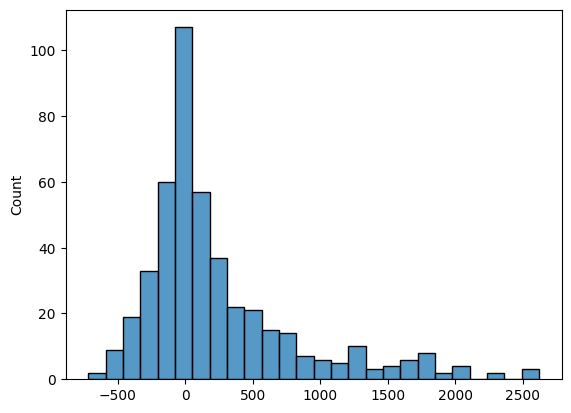

In [49]:
sns.histplot(residuals)

In [50]:
final_residuals = pd.concat([bikes_daily['casual'],predicted_vals, residuals], axis=1)